# Set Cover problem




In [112]:
   
from itertools import accumulate
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm.auto import tqdm


## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [113]:
# UNIVERSE_SIZE = [100, 1000, 10000, 100000, 100000, 100000]
# NUM_SETS = [10, 100, 1000, 10000, 10000, 10000]
# DENSITY = [0.2, 0.2, 0.2, 0.1, 0.2, 0.3]

## Helper Functions

In [114]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution: np.array) : # quanto sei vicino alla solz ottimale 
    return ( valid(solution) , -cost(solution)) #min

# SIMPLE RHMC: 


when values are: 


ic| fitness(solution): (np.False_, np.float64(-159.1274239841013))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| fitness(solution): (np.False_, np.float64(-0.0))
ic| history.index(float(solution_fitness[1])): 531
ic| fitness(solution): (np.True_, np.float64(-16018.346665633235))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| fitness(solution): (np.True_, np.float64(-6729.242638870323))
ic| history.index(float(solution_fitness[1])): 7556


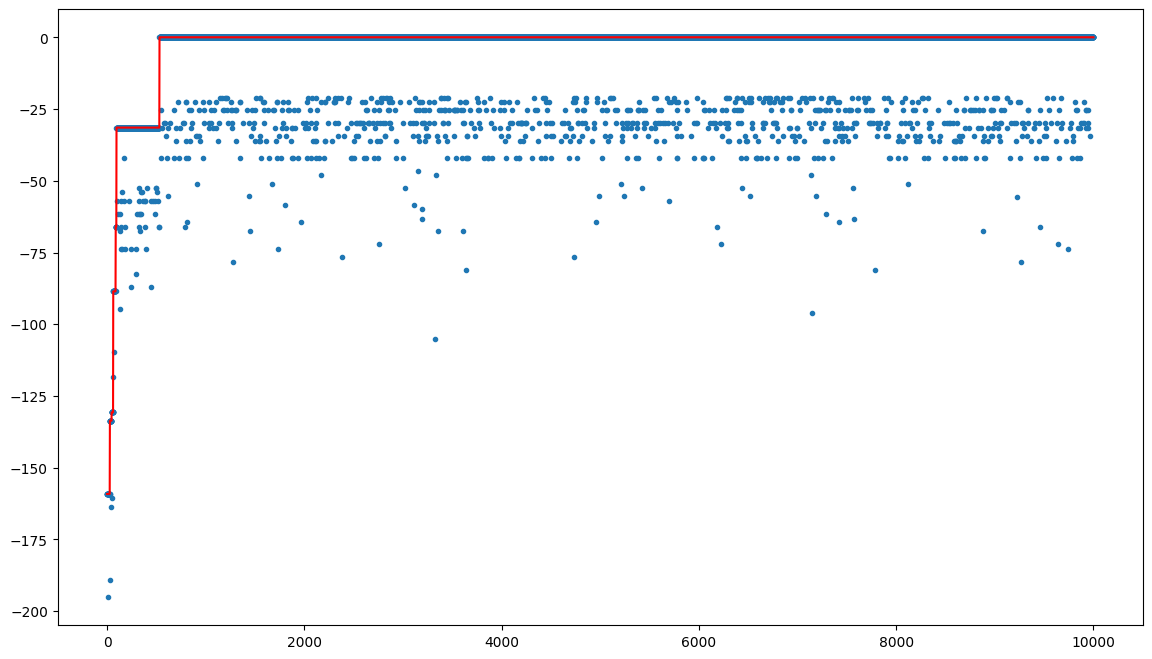

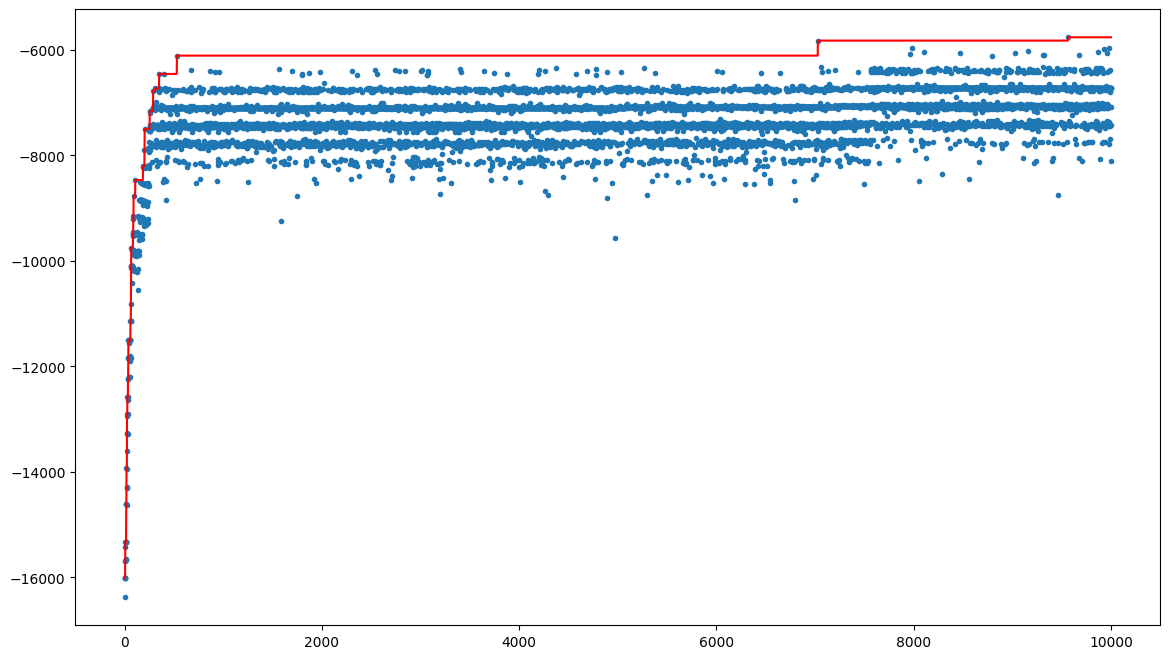

In [115]:
universe_size = [100, 1000]
num_sets = [10, 100]
density = [0.2, 0.2]


def multiple_mutation (solution: np.ndarray, NUM_SETS: int ) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask) #genera molti falsi
    return new_solution 


## CICLO FOR CON I VALORI CHE DEVE SVOLGERE QUESTO ALG QUI:
for UNIVERSE_SIZE, NUM_SETS, DENSITY in zip(universe_size, num_sets, density):


    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

    # DON'T EDIT THESE LINES!
    SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
    for s in range(UNIVERSE_SIZE):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)



    MAX_STEPS=10_000
    solution = rng.random(NUM_SETS) < 0.5 # soluzione iniziale random 


    solution_fitness = fitness(solution)
    history = [float( solution_fitness[1] )] #only the cost

    ic(fitness(solution))

    tweak = multiple_mutation # 


    #for steps in range(10_000): 
    for steps in tqdm(range(MAX_STEPS)):

        new_solution = tweak(solution, NUM_SETS)
        f = fitness(new_solution)

        history.append(float(f[1]))
        
        if f > solution_fitness:
            solution = new_solution
            solution_fitness = fitness(solution)


    #ic(solution)
    ic(fitness(solution))
    ic(history.index(float(solution_fitness[1])))  # Cerca solo il costo nella lista `history`


    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    _ = plt.scatter(range(len(history)), history, marker=".")


# SELFE ADAPTIVE: 

when values are:

ic| fitness(solution): (np.True_, np.float64(-2141539.4465849604))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| fitness(solution): (np.True_, np.float64(-131888.67931741243))
ic| history.index(float(solution_fitness[1])): 4141


KeyboardInterrupt: 

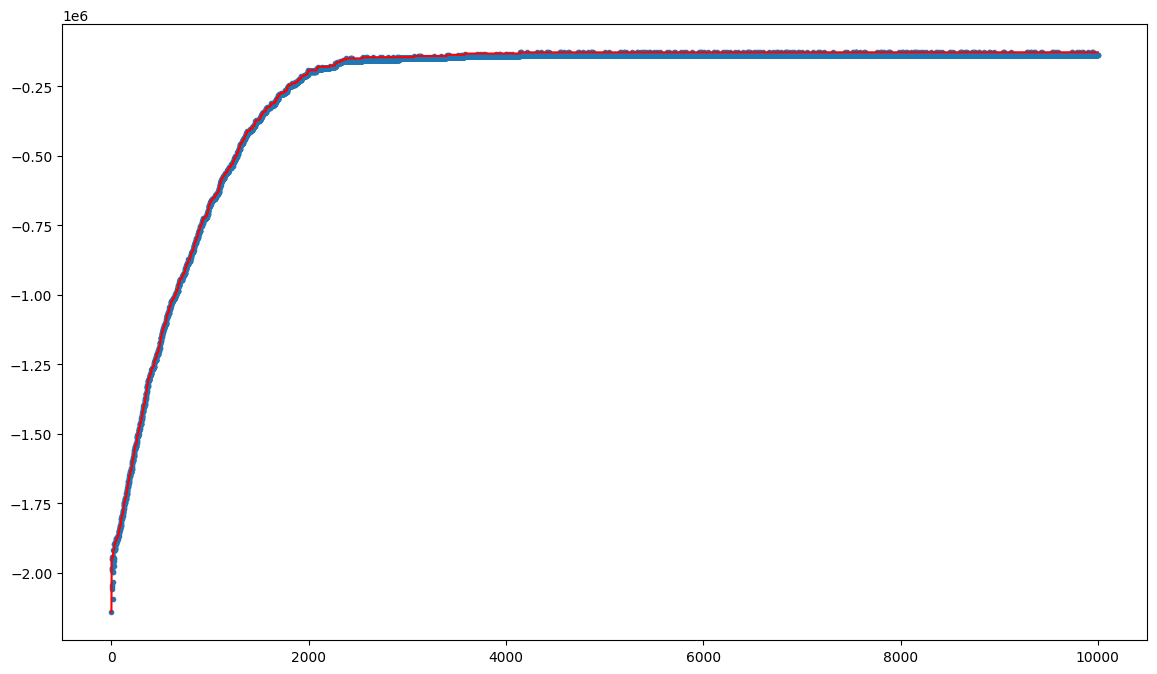

In [116]:

universe_size = [10000, 100000, 100000, 100000]
num_sets = [1000, 10000, 10000, 10000]
density = [0.2, 0.1, 0.2, 0.3]


def multiple_mutation_strenght(solution: np.ndarray,  NUM_SETS: int, strength: float = 0.3) -> np.ndarray:
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint( NUM_SETS)] = True
    new_sol = np.logical_xor(solution, mask)
    return new_sol




## CICLO FOR CON I VALORI CHE DEVE SVOLGERE QUESTO ALG QUI:
for UNIVERSE_SIZE, NUM_SETS, DENSITY in zip(universe_size, num_sets, density):

    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

    # DON'T EDIT THESE LINES!
    SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
    for s in range(UNIVERSE_SIZE):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)



    MAX_STEPS=10_000
    BUFFER_SIZE = 5
    solution = rng.random(NUM_SETS) < 0.5 # soluzione iniziale random 


    solution_fitness = fitness(solution)
    history = [float( solution_fitness[1] )] #only the cost

    ic(fitness(solution))


    strength= 0.3 
    buffer = list() 


    #for steps in range(10_000): 
    for steps in tqdm(range(MAX_STEPS)):
    

        new_solution = multiple_mutation_strenght(solution,NUM_SETS,strength)
        f = fitness(new_solution)

        history.append(float(f[1]))
        buffer.append(f  > solution_fitness)    
        buffer  = buffer[-BUFFER_SIZE:]  # prende gli ultimi 17 elementi 
        if sum(buffer) > 10  :
            strength *= 1.1
        elif sum(buffer) < 10  :
            strength /= 1.1
        

        if f > solution_fitness:
            solution = new_solution
            solution_fitness = fitness(solution)


    ic(fitness(solution))
    ic(history.index(float(solution_fitness[1])))  # Cerca solo il costo nella lista `history`



    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    _ = plt.scatter(range(len(history)), history, marker=".")

